source_city  destination_city
Bangalore    Chennai             22573.185689
             Delhi               19746.484106
             Hyderabad           21886.188883
             Kolkata             24631.108723
             Mumbai              25887.684502
Chennai      Bangalore           23405.422526
             Delhi               21946.879653
             Hyderabad           22866.927328
             Kolkata             23667.149966
             Mumbai              25118.401202
Delhi        Bangalore           19904.508234
             Chennai             22127.553940
             Hyderabad           18768.239479
             Kolkata             23655.844456
             Mumbai              19777.253580
Hyderabad    Bangalore           22195.170087
             Chennai             22527.946093
             Delhi               18548.644734
             Kolkata             22237.613504
             Mumbai              22638.104581
Kolkata      Bangalore           24130.762785
    

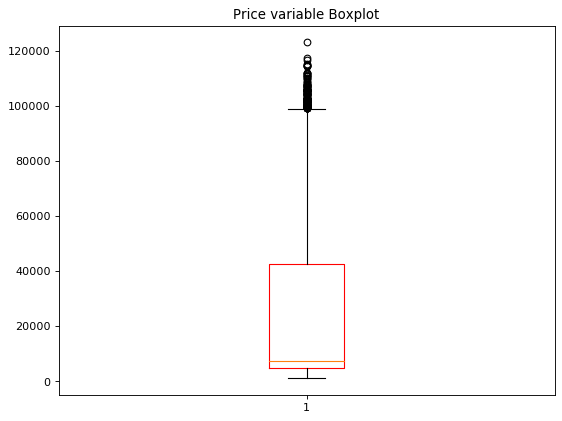

In [1]:
# %% [markdown]
# asks
# Hypothesis-based EDA:
# 
# Does the price vary with Airlines for the same source_city to destination_city?
# 
# How is the price affected when tickets are bought just 1 or 2 days before departure?
# 
# Does the ticket price change based on the departure time and arrival time?
# 
# Check the distribution of the Price variable and remove outliers to create a new dataset.
# 
# Build a Linear regression Model with all the features (m1), select only the top 5 features using the model coefficient, and rebuild the regression model (m2) again using Statsmodels. Observe if there are any differences between the two models in Adjusted-R2 and R2. 
# 
# Build a Linear Regression model using Scikit learn and Statsmodels; compare the results
# 
# Analyze the impact of airlines, time of purchase, and departure/arrival time on ticket prices.
# 
#  

# %%
import pandas as pd
df=pd.read_csv("/Users/guilhembarroyer/Desktop/Projects/Machine Learning Path/Project 1/Flight_Price_Prediction.csv", index_col=0)


# %%
df.head(3)



# %%
df.describe()

# %%
grouped_flights = df.groupby(['source_city', 'destination_city'])

price_variation = grouped_flights['price'].std()

print(price_variation)

# %% [markdown]
# Q1: We notice than the standard_deviation for each type of flight (same departure and destination) are pretty significant. That means flights' prices vary despite the constancy of the distance. e.g. A flight linking Delhi to Mumbai vary by 19777 
# rps on average. 

# %%
flights_by_booking_date=df.groupby(["days_left"])

flights_by_booking_date["price"].describe()

# %% [markdown]
# Q2: We can observ a large drop of the prices when the tickets are bought 1 or 2 days before the departure, contrary to the others prices which are 10 times more expensive. On average prices are near to 2500 on the last 2 days against 25000 for the others. However, we notice than earlier tickets are bought cheaper they are (less than 20000 when bought 18 days before contrarly than ones bought between 3 and 17 days before).
# 

# %%
flights_by_arrival_time=df.groupby(["arrival_time"])
price_by_arrival_time=flights_by_arrival_time["price"].mean()
price_by_arrival_time=price_by_arrival_time.reset_index()
price_by_arrival_time=price_by_arrival_time.sort_values("price")

flights_by_departure_time=df.groupby(["departure_time"])
price_by_departure_time=flights_by_departure_time["price"].mean()
price_by_departure_time=price_by_departure_time.reset_index()
price_by_departure_time=price_by_departure_time.sort_values("price")

print(price_by_arrival_time,'\n', price_by_departure_time )



# %% [markdown]
# Q3: the ticket price change depending on both departure and arrival time. Although we can't describe precise correlation, we just observ that late night arrivals and departures are both half the other prices cheaper.

# %%
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prices=df["price"]

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(prices, boxprops=dict(color='red'))
plt.title('Price variable Boxplot');

# %%
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_no_outliers = df[df["price"] <= upper_bound]

df_no_outliers.describe()


# %% [markdown]
# We observe a lower in the max and mean price value thanks to the supress of the outliers.

# %%
import statsmodels.api as sm

x=df["duration"]
y=df["price"]

X=sm.add_constant(x)

lr=sm.OLS(y, X).fit()

lr.params
print(lr.summary())


